In [2]:
from utils import get_random_indices, get_file_paths, load_custom_model # , interpolate_segformer_outputs

from from_preprocessing_to_training import AttentionUnet, Losses
# from tf_model_related import AttentionUnet, Losses
from preprocessing import LoadPreprocessImages

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from segmentation_mask_overlay import overlay_masks

import numpy as np
from tqdm import tqdm
import cv2
import itertools
from glob import glob

## 2020

In [3]:
losses = Losses()

In [4]:
attention_unet = AttentionUnet((256, 256, 3))

In [5]:
model_path = "output_models/35_14_61_49/2020/intermediary_AttentionUnet_36000_trains_no_noise_30_epochs_img_size_256_LR_0_001_BS_64_FocalTverskyLoss_96acc_8463iou.h5"
# "output_models/AttentionUnet_600_trains__epochs_1_no_equalizing_with_normalizing_img_size_256_LR_0_001_BS_32_FocalTverskyoLoss.h5"

In [6]:
custom_objects_list=[attention_unet.expend_as, attention_unet.AttnGatingBlock, attention_unet.UnetConv2D, attention_unet.UnetGatingSignal, losses.tversky, losses.focal_tversky]

In [7]:
# from keras import backend as K
model_2020 = load_custom_model(model_path=model_path, custom_objects_list=custom_objects_list)


In [7]:
model_2020.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_1 (Conv2D)            (None, 256, 256, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv1_1_bn (BatchNormaliza  (None, 256, 256, 32)         128       ['conv1_1[0][0]']             
 tion)                                                                                            
                                                                                                  
 conv1_1_act (Activation)    (None, 256, 256, 32)         0         ['conv1_1_bn[0][0]']      

In [8]:
load_preprocess_images = LoadPreprocessImages()
imgs_train, imgs_mask_train, imgs_test, imgs_mask_test = load_preprocess_images.load_preprocess_images(rgb=True, equalize=False, add_noise=False, max_samples=150)

100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 237.71it/s]


In [9]:
model_2020.evaluate(imgs_test, imgs_mask_test)

1/1 [==============================] - 3s 3s/step - loss: 0.0302 - binary_accuracy: 0.9528 - io_u: 0.8385


[0.030179616063833237, 0.9527786374092102, 0.8384531736373901]

In [10]:
val_preds = model_2020.predict(imgs_test)

1/1 [==============================] - 2s 2s/step


In [119]:
idx = 9

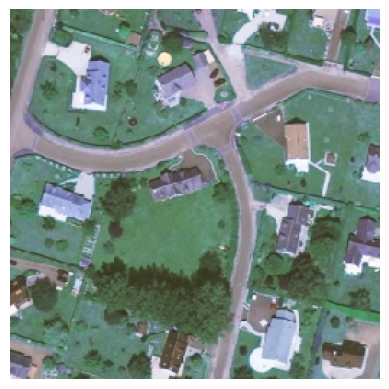

In [120]:
plt.imshow(imgs_test[idx])
plt.axis('off');

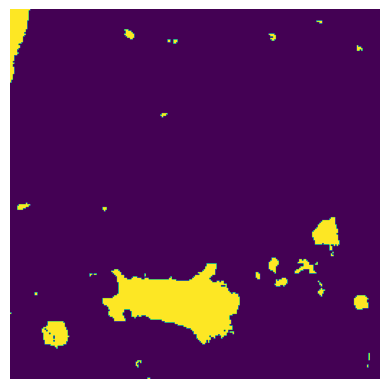

In [121]:
plt.imshow(imgs_mask_test[idx])
plt.axis('off');

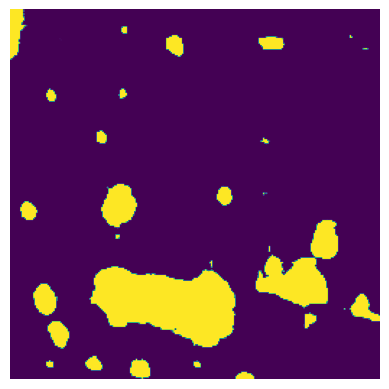

In [122]:
plt.imshow(val_preds[idx])
plt.axis('off');

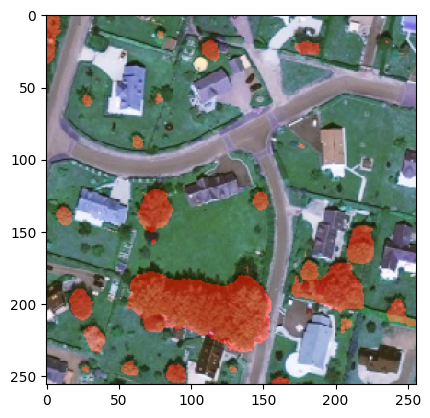

In [123]:
fig = overlay_masks(imgs_test[idx], np.round(val_preds[idx]), colors=[(1, 0, 0)])
plt.imshow(fig)

## Previous years

### 2012

In [7]:
import json
with open('config.json') as f:
    config = json.load(f)

In [8]:
losses = Losses()
attention_unet = AttentionUnet((256, 256, 3))
model_path = "output_models/35_14_61_49/2012/intermediary_AttentionUnet_3600_trains_wavelet_noise_30_epochs_img_size_256_LR_0_001_BS_64_FocalTverskyLoss_92acc_7666iou.h5"
# "output_models/AttentionUnet_600_trains__epochs_1_no_equalizing_with_normalizing_img_size_256_LR_0_001_BS_32_FocalTverskyoLoss.h5"
custom_objects_list=[attention_unet.expend_as, attention_unet.AttnGatingBlock, attention_unet.UnetConv2D, attention_unet.UnetGatingSignal, losses.tversky, losses.focal_tversky]
model_2012 = load_custom_model(model_path=model_path, custom_objects_list=custom_objects_list)
model_2012.summary()

NameError: Exception encountered when calling layer "psi_up_1" (type Lambda).

name 'K' is not defined

Call arguments received by layer "psi_up_1" (type Lambda):
  • inputs=tf.Tensor(shape=(None, 32, 32, 1), dtype=float32)
  • mask=None
  • training=None

In [260]:
year = 2012

In [261]:
img_row = 256
img_col = 256
img_chan = 3
gt_chan = 1
epochnum = 10
val_split = 0.2
input_size = (img_row, img_col, img_chan)

older_img_list = sorted(
    list(
        itertools.chain.from_iterable(
            [glob(i + "*.jpg") for i in glob(f"vignettes/rgb_older/rgb_{year}/*/", recursive=True)]
        )
    )
)

n = 100
random_indices = get_random_indices(range(len(older_img_list)), n)
random_indices.sort()
older_img_list = np.array(older_img_list)[random_indices].tolist()

older_num_imgs = len(older_img_list)

older_orig_imgs = []
older_imgs = np.zeros((older_num_imgs, img_row, img_col, 3))


In [262]:
for i in tqdm(range(older_num_imgs)):
    older_tmp_img = plt.imread(older_img_list[i])
    older_orig_imgs.append(older_tmp_img)

    older_img = cv2.resize(older_tmp_img, (img_col,img_row), interpolation=cv2.INTER_NEAREST)

    # img = equalize_histogram(img, convert_to_tensors=False)
    
    if older_img.max() > 1:
        older_img = older_img/255.
        
    older_imgs[i] = older_img

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 500.38it/s]


In [263]:
val_preds_2012 = model_2012.predict(older_imgs)

4/4 [==============================] - 4s 762ms/step


In [309]:
idx = 29

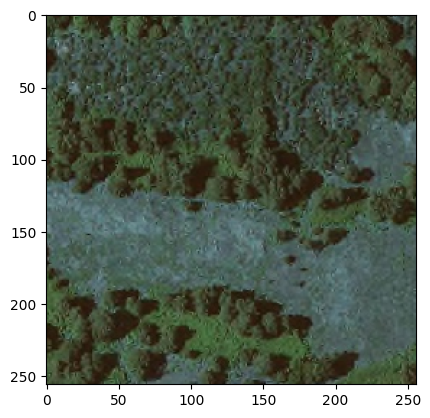

In [310]:
plt.imshow(older_imgs[idx])

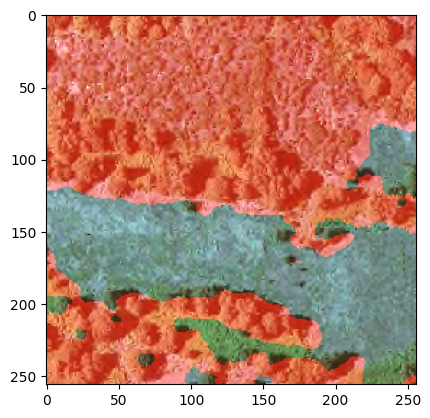

In [311]:
fig = overlay_masks(older_imgs[idx], np.round(val_preds_2012[idx]), colors=[(1, 0, 0)])
plt.imshow(fig)

### 1993

### Attention Unet

In [9]:
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
# from pipeline_creation import equalize_histogram
from skimage.exposure import equalize_hist

In [10]:
losses = Losses()
attention_unet = AttentionUnet((256, 256, 1))

In [11]:
custom_objects_list=[attention_unet.expend_as, attention_unet.AttnGatingBlock, attention_unet.UnetConv2D, attention_unet.UnetGatingSignal, losses.tversky, losses.focal_tversky]

In [12]:
model_1993_path="output_models/35_14_61_49/1993/intermediary_AttentionUnet_B&W_4500_trains_10e_4_gaussian_random_noise_30_epochs_img_size_256_LR_0_001_BS_64_FocalTverskyLoss.h5"
model_1993_attunet = load_custom_model(model_path=model_1993_path, custom_objects_list=custom_objects_list)


In [13]:
model_1993_attunet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv1_1 (Conv2D)            (None, 256, 256, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv1_1_bn (BatchNormaliza  (None, 256, 256, 32)         128       ['conv1_1[0][0]']             
 tion)                                                                                            
                                                                                                  
 conv1_1_act (Activation)    (None, 256, 256, 32)         0         ['conv1_1_bn[0][0]']      

In [8]:
img_list_1993_attunet = sorted(
    list(
        itertools.chain.from_iterable(
            [glob(i + "*.TIF") for i in glob(f"donnees/BDORTHO/1993_OK/", recursive=True)]
        )
    )
)

In [9]:
len(img_list_1993_attunet)

3765

In [10]:
n = 100
random_indices = get_random_indices(range(len(img_list_1993_attunet)), n)
random_indices.sort()
img_list_1993_attunet = np.array(img_list_1993_attunet)[random_indices].tolist()

In [11]:
num_imgs_1993_attunet = len(img_list_1993_attunet)
imgs_1993_attunet = np.zeros((num_imgs_1993_attunet, 256, 256))

In [12]:
def adap_hist_equalize(img):
    # histogram equalization
    equalized_image = cv2.equalizeHist(img)
    # Adaptive histogram equalization is supposed to be more robust
    # CLAHE = Contrast Limited Adaptive Histogram Equalization
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
    # Apply CLAHE to the image
    adap_equalized_image = clahe.apply(equalized_image)
    return adap_equalized_image

In [13]:
for i in tqdm(range(num_imgs_1993_attunet)):
    tmp_img_1993_attunet = np.asarray(load_img(img_list_1993_attunet[i], color_mode="grayscale")) # 
    cropped_img_1993_attunet = tmp_img_1993_attunet[0:288, 0:288]
    img_1993_attunet = cv2.resize(cropped_img_1993_attunet, (256,256), interpolation=cv2.INTER_NEAREST)
    # img_1993 = adap_hist_equalize(img_1993)

    if img_1993_attunet.max() > 1:
        img_1993_attunet = img_1993_attunet/255.
        
    imgs_1993_attunet[i] = img_1993_attunet

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.14it/s]


In [75]:
val_preds_1993_attunet = model_1993_attunet.predict(imgs_1993_attunet)

4/4 [==============================] - 10s 2s/step


In [103]:
idx = 8

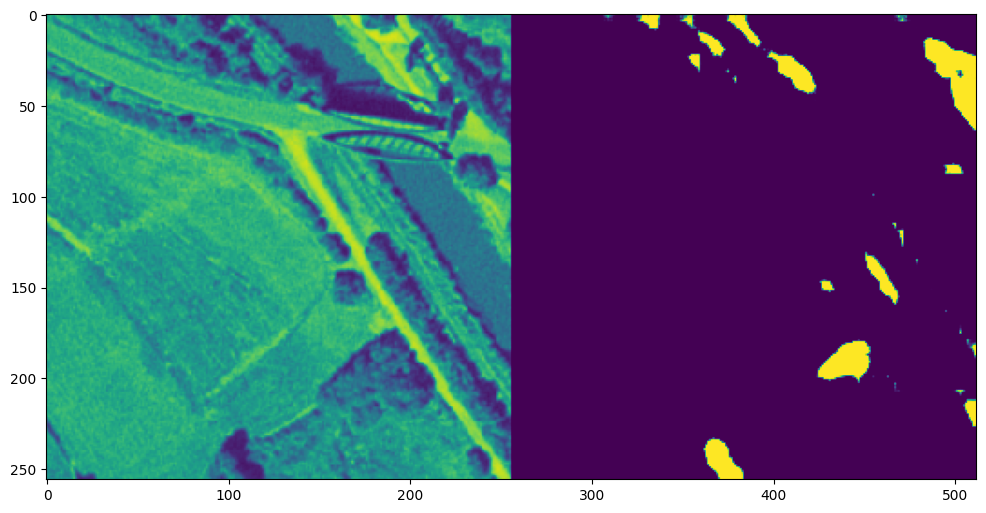

In [104]:
ax, _ = plt.subplots(figsize=(12, 12))
plt.imshow(np.hstack([imgs_1993_attunet[idx], val_preds_1993_attunet[idx][:,:,0]]))

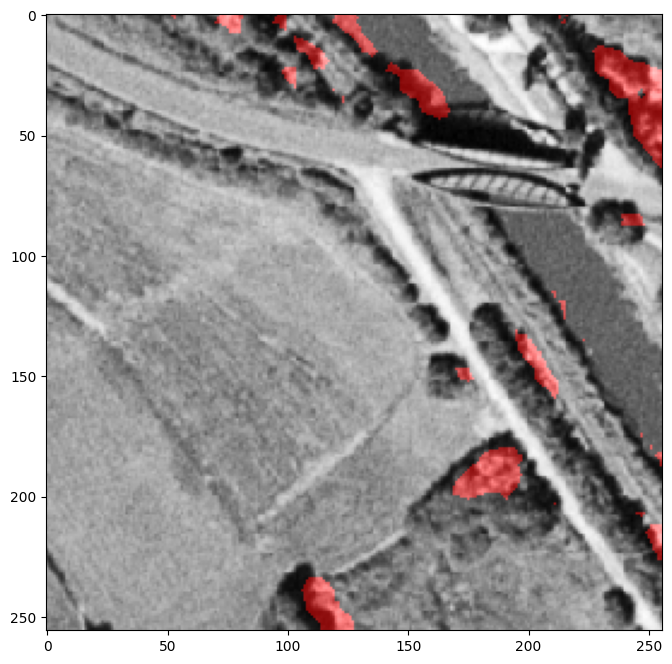

In [105]:
fig = overlay_masks(imgs_1993_attunet[idx], np.round(val_preds_1993_attunet[idx]), colors=[(1, 0, 0)])
plt.subplots(figsize=(8, 8))
plt.imshow(fig)

#### Attention Unet with modified 2020 images to match 1993 quality

In [36]:
from from_preprocessing_to_training import orthosSequence

In [37]:
max_samples = 100

In [38]:
input_img_paths, target_img_paths = get_training_file_paths()

if max_samples:
    random_indices = get_random_indices(range(len(input_img_paths)), max_samples)
    random_indices.sort()
    input_img_paths = np.array(input_img_paths)[random_indices].tolist()
    target_img_paths = np.array(target_img_paths)[random_indices].tolist()

In [39]:
epochnum = 20
val_split = 0.2
img_size = 256
batch_size = 32

In [40]:
val_gen = orthosSequence(batch_size=batch_size, input_img_paths=input_img_paths, target_img_paths=target_img_paths, rgb=False, add_noise=True)

In [45]:
preds_1993_modified_2020 = model_1993.predict(val_gen)

3/3 [==============================] - 7s 2s/step


In [55]:
val_gen.__getitem__(0)[0].shape

(32, 256, 256, 1)

In [132]:
idx = 2

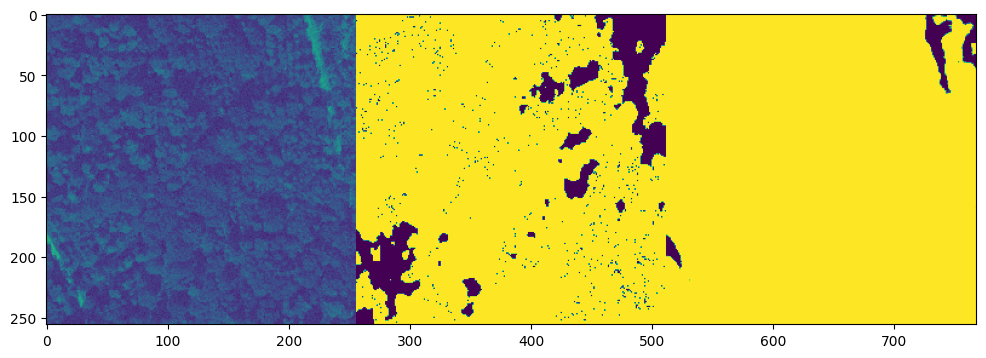

In [133]:
ax, _ = plt.subplots(figsize=(12, 12))
plt.imshow(np.hstack([val_gen.__getitem__(0)[0][idx], val_gen.__getitem__(0)[1][idx], preds_1993_modified_2020[idx]]))

## SegFormer

In [2]:
from transformers import TFSegformerForSemanticSegmentation, SegformerConfig

In [3]:
model_path = "output_models/SegFormer_B&W_8000_trains_epochs_10_no_equalizing_with_normalizing_with_2_noise_img_size_256_LR_6e_05_BS_4"
model = TFSegformerForSemanticSegmentation.from_pretrained(model_path,
                                                           local_files_only=True)


All model checkpoint layers were used when initializing TFSegformerForSemanticSegmentation.

All the layers of TFSegformerForSemanticSegmentation were initialized from the model checkpoint at output_models/SegFormer_B&W_8000_trains_epochs_10_no_equalizing_with_normalizing_with_2_noise_img_size_256_LR_6e_05_BS_4.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSegformerForSemanticSegmentation for predictions without further training.


In [4]:
LR = 0.00006
optimizer = tf.keras.optimizers.Adam(learning_rate=LR)
model.compile(optimizer=optimizer)

In [5]:
model.summary()

Model: "tf_segformer_for_semantic_segmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 segformer (TFSegformerMain  multiple                  3319392   
 Layer)                                                          
                                                                 
 decode_head (TFSegformerDe  multiple                  395778    
 codeHead)                                                       
                                                                 
Total params: 3715170 (14.17 MB)
Trainable params: 3714658 (14.17 MB)
Non-trainable params: 512 (2.00 KB)
_________________________________________________________________


In [6]:
img_list_1993 = sorted(
    list(
        itertools.chain.from_iterable(
            [glob(i + "*.TIF") for i in glob(f"donnees/BDORTHO/1993_OK/", recursive=True)]
        )
    )
)

In [7]:
n = 300
random_indices = get_random_indices(range(len(img_list_1993)), n)
random_indices.sort()
img_list_1993 = np.array(img_list_1993)[random_indices].tolist()

In [8]:
num_imgs_1993 = len(img_list_1993)
imgs_1993 = np.zeros((num_imgs_1993, 3, 256, 256))

In [9]:
for i in tqdm(range(num_imgs_1993)):
    tmp_img_1993 = plt.imread(img_list_1993[i])
    cropped_img_1993 = tmp_img_1993[0:288, 0:288]
    img_1993 = cv2.resize(cropped_img_1993, (256,256), interpolation=cv2.INTER_NEAREST)
    # img_1993 = adap_hist_equalize(img_1993)

    if img_1993.max() > 1:
        img_1993 = img_1993/255.
        
    imgs_1993[i] = tf.transpose(np.stack([img_1993]*3, axis=2), (2, 0, 1))

100%|████████████████████████| 300/300 [00:27<00:00, 10.88it/s]


In [10]:
preds = model.predict(imgs_1993).logits
preds = tf.math.argmax(preds, axis=1)
preds = tf.expand_dims(preds, -1)

10/10 [==============================] - 41s 3s/step


In [65]:
idx = 19

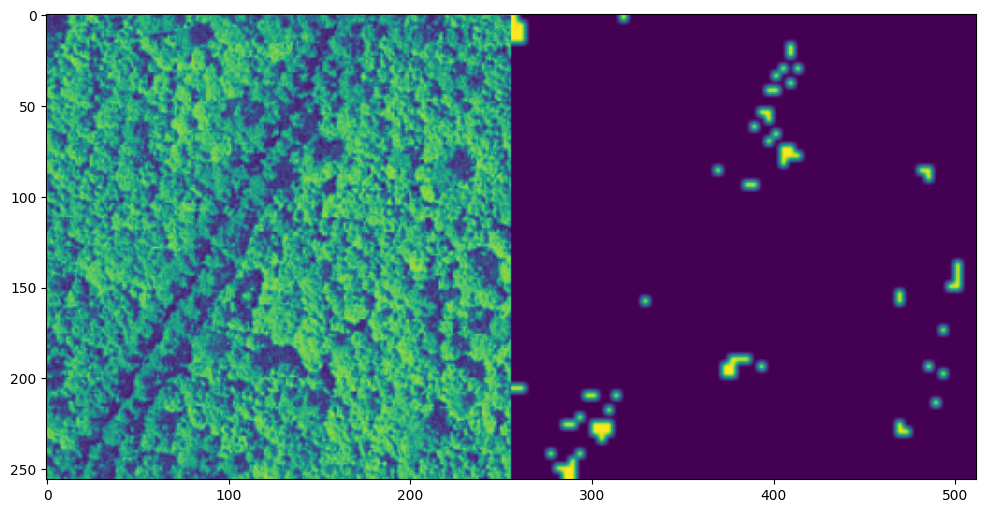

In [66]:
ax, _ = plt.subplots(figsize=(12, 12))

plt.imshow(np.hstack([tf.transpose(imgs_1993[idx], (1, 2, 0))[:,:,0], interpolate_segformer_outputs(preds)[idx][:,:,0]]))

# Des bêtises